# Music classfication using MFCC (mean of 13 MFCC features)

In [2]:
# import Libraries
import scipy
from matplotlib.pyplot import specgram
from scipy import io
import scipy.io.wavfile
import soundfile as sf
import numpy as np
import pandas as pd
from scipy.fftpack import fft
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import librosa
import timeit
import os

In [3]:
# import LR and SVM classifieres and confusion matrix
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(random_state=0)

from sklearn import svm
clf_svm = svm.SVC()

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Using training data

In [4]:
# get training data and MFCC feature extraction
fun_dict1={}
dir = 'combinedata/'

start_time = timeit.default_timer()
for root, dirs, files in os.walk(dir):
        for name in files:
            data, samplerate = sf.read(dir+name)
            mfcc_transpose = mfcc.transpose()
            num_ceps = mfcc_transpose.shape[0]
            fun_dict1[name]=mfcc_transpose[int(num_ceps*1/10):int(num_ceps*9/10)].mean(axis=0) 
        
print("--- %s seconds ---" % (timeit.default_timer() - start_time))

--- 52.38643068148055 seconds ---


In [47]:
# convert dictionary to  dataframe : making data frame of the training for further processing using Pandas
df2 = pd.DataFrame(fun_dict1)
df3 = df2.transpose()
l = df3.index 
class_response = pd.DataFrame(l.str.split('.',1).tolist(),columns = ['response','rest']) # get labels of the song
df3.index = range(0,len(df3)) #training dataset without class response
df3.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-111.997148,121.238132,-17.750105,41.854080,-7.798288,18.580311,-13.362260,15.746927,-12.519051,11.710580,-7.962342,9.194592
1,-199.126220,124.311799,7.815542,34.918110,1.114070,20.905914,-10.308863,23.485749,-11.506881,12.558936,-6.550804,5.311981
2,-89.878456,142.878391,-29.662242,31.957704,-14.044570,25.146260,-13.429581,11.417018,-11.762054,9.552929,-12.685950,5.509914
3,-197.056464,149.377025,5.019639,26.605005,0.949209,14.356635,-5.337457,9.811323,-0.671175,8.977702,-2.662427,5.852935
4,-159.281609,123.798871,-35.641670,22.123774,-32.624306,11.247513,-23.257060,1.525912,-12.368521,1.780876,-13.537640,-2.735035


In [20]:
# scaling of traing data with standard scalar
train_data = df3
train_mfccdata =pd.DataFrame(train_data)
scaler=StandardScaler()
scaler.fit(train_mfccdata)
scaled_train_data=scaler.transform(train_mfccdata)

In [26]:
# assign new variables namely X and y for taining features and labels
X = scaled_train_data
y = class_response.response

In [48]:
# run train test split for the training data
test_sz = 0.3 # test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_sz, random_state=42)

In [31]:
# logistic regression (LR)
clf_lr.fit(X_train,y_train) # train the classifier: 
y_pred = clf_lr.predict(X_test) # predict levels
cnf_matrix = confusion_matrix(y_test, y_pred) # Confusion matrix
cnf_matrix

array([[12,  1,  0,  3,  0,  0,  5,  0,  0,  9],
       [ 0, 15,  0,  0,  0,  0,  0,  0,  1,  2],
       [ 5,  1, 12,  0,  0,  2,  0,  2,  1,  2],
       [ 2,  0,  2, 12,  1,  0,  3,  6,  2,  5],
       [ 0,  2,  4,  3,  8,  0,  8,  3,  6,  1],
       [ 2,  6,  2,  1,  3, 11,  0,  1,  3,  4],
       [ 2,  0,  0,  0,  0,  0, 23,  0,  1,  0],
       [ 0,  0,  1,  0,  0,  0,  0, 19,  1,  1],
       [ 2,  0,  2,  0,  1,  0,  1,  2, 14,  2],
       [ 4,  0,  2,  7,  1,  0,  4,  0,  1,  5]])

In [32]:
# SVM
clf_svm.fit(X_train,y_train) # train your classifier:
y_pred = clf_svm.predict(X_test) # predict levels
cnf_matrix = confusion_matrix(y_test, y_pred) # Confusion matrix
cnf_matrix

array([[17,  1,  0,  3,  0,  0,  5,  0,  0,  4],
       [ 0, 16,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 2,  1, 14,  2,  0,  2,  0,  0,  1,  3],
       [ 0,  0,  2, 16,  1,  0,  2,  5,  1,  6],
       [ 0,  0,  4,  5, 14,  0,  8,  1,  2,  1],
       [ 0,  6,  3,  3,  3, 13,  0,  0,  3,  2],
       [ 3,  0,  0,  0,  0,  0, 22,  0,  1,  0],
       [ 0,  0,  2,  0,  1,  0,  0, 18,  0,  1],
       [ 1,  0,  1,  2,  5,  1,  1,  2,  9,  2],
       [ 0,  0,  1,  3,  1,  0,  4,  0,  2, 13]])

In [36]:
# function of drawing confusion matrix
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)#'viridis')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[17  1  0  3  0  0  5  0  0  4]
 [ 0 16  0  0  0  0  0  0  1  1]
 [ 2  1 14  2  0  2  0  0  1  3]
 [ 0  0  2 16  1  0  2  5  1  6]
 [ 0  0  4  5 14  0  8  1  2  1]
 [ 0  6  3  3  3 13  0  0  3  2]
 [ 3  0  0  0  0  0 22  0  1  0]
 [ 0  0  2  0  1  0  0 18  0  1]
 [ 1  0  1  2  5  1  1  2  9  2]
 [ 0  0  1  3  1  0  4  0  2 13]]


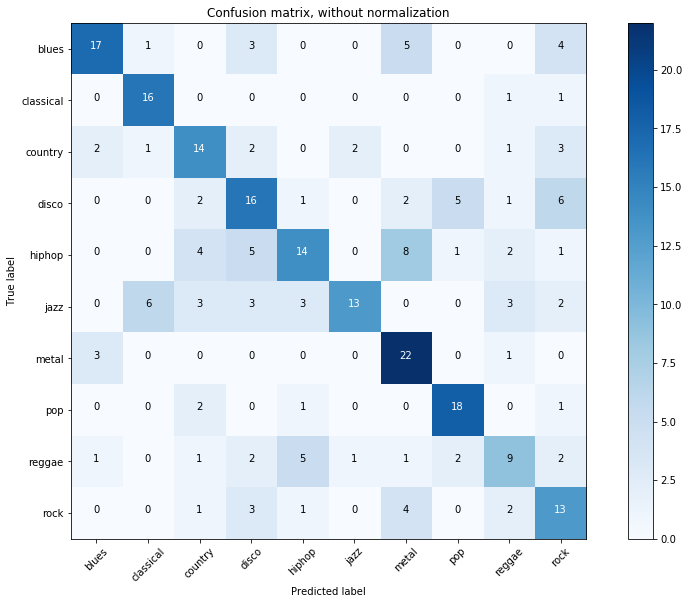

In [37]:
# Plot non-normalized confusion matrix
label = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock'] # class labels
fig=plt.figure()
plot_confusion_matrix(cnf_matrix, classes=label, title='Confusion matrix, without normalization')
fig.set_size_inches(12, 10)
ax = fig.add_subplot(111)
plt.show()
#fig.savefig('confusion_mat_LR_feature2.eps')  # save figure

# 10 fold cross validation of the training data

In [44]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
kf = KFold(n_splits=10,shuffle=True,random_state=0)

In [45]:
X_c = scaled_train_data
y_c = y
df_cv = pd.DataFrame(X_c)
df_cv['label'] = y_c
train_index_all = np.zeros((10,810))
l = 0
sum = 0
for train_index, test_index in kf.split(df_cv):
    #print("TRAIN:", train_index.shape, "TEST:", test_index.shape)
    train_index_all[l,:] = train_index
    l = l + 1
    train_data_cv = X_c[train_index]
    label_train_cv = y_c[train_index]
    test_data_cv = X_c[test_index]
    label_test_cv = y_c[test_index]
    clf_svm.fit(train_data_cv,label_train_cv)
    y_pred_cv = clf_svm.predict(test_data_cv)
    y_true = label_test_cv
    y_pred = y_pred_cv
    print("Accuracy:",accuracy_score(y_true, y_pred))
    sum +=accuracy_score(y_true, y_pred)
    #sum += nltk.classify.accuracy(classifier, test_data)
average = sum/10.0

Accuracy: 0.555555555556
Accuracy: 0.544444444444
Accuracy: 0.644444444444
Accuracy: 0.633333333333
Accuracy: 0.555555555556
Accuracy: 0.655555555556
Accuracy: 0.511111111111
Accuracy: 0.544444444444
Accuracy: 0.566666666667
Accuracy: 0.611111111111


# Using test data

In [39]:
# get tesing data and MFCC feature extraction
fun_dict2={}
test_directory = './validation/rename'
for root, dirs, files in os.walk(test_directory):
    for name in files:
        data, samplerate = sf.read(test_directory+'/'+name)
        mfcc = librosa.feature.mfcc(y=data, sr=samplerate,n_mfcc=12)
        mfcc_transpose = mfcc.transpose()
        num_ceps = mfcc_transpose.shape[0]
        fun_dict2[name]=mfcc_transpose[int(num_ceps*1/10):int(num_ceps*9/10)].mean(axis=0)

In [40]:
# convert dictionary to  dataframe
test_data2=pd.DataFrame(fun_dict2)
test_data2=test_data2.transpose()
test_data2.index = range(0,len(test_data2))

# scaling of traing data
test_data2_scaled =pd.DataFrame(test_data2)
scaler=StandardScaler()
scaler.fit(test_data2_scaled)
scaled_test_data2=scaler.transform(test_data2_scaled)

In [41]:
# predict test data classes with logistic regression (LR) and save the results in excel file
clf_lr.fit(X,y) # X = train data, y = train level
lr_pred = clf_lr.predict(scaled_test_data2)
df = pd.DataFrame(list(lr_pred))
df.to_excel('output_lr.xlsx', header='class', index=False)

In [42]:
# predict test data classes with SVM and save the results in excel file
clf_svm.fit(X,y)
svc_pred = clf_svm.predict(scaled_test_data2)
df = pd.DataFrame(list(svc_pred))
df.to_excel('output_svc.xlsx', header='class', index=False)

# Use those training data with good accuracy for training

In [46]:
results_index = [int(i) for i in list(train_index_all[9,])] # training set index with good accuracy from CV
X_new = scaled_train_data[results_index]
y_new = y[results_index]

In [59]:
# predict test data classes with SVM and save the results in excel file
clf_svm.fit(X_new,y_new)
svc_pred = clf_svm.predict(scaled_test_data2)
df = pd.DataFrame(list(svc_pred))
df.to_excel('output_CV.xlsx', header='class', index=False)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# CV with random shuffling of the training data

In [258]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
cross_val_score(clf_svm, X_c, y_c, cv=cv)

array([ 0.67777778,  0.78888889,  0.66666667,  0.8       ,  0.74444444,
        0.7       ,  0.67777778,  0.7       ,  0.65555556,  0.77777778])